In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
from utility import plot_template
import seaborn as sns 

In [38]:
def convert_float(arr):
    temp = []
    i = 0 
    for a in arr:
        try:
            temp.append(float(a))
        except:
            print('found missing data')
    return np.asarray(temp)

In [31]:
def chk_nan(a):
    flag = 1
    try:
        float(a)
    except:
        flag=0
    return flag
chk_nan(' ')

0

In [48]:
agn = pd.read_csv('AGN_selected_col.csv')
agn_hard_hm = agn['hard_hm'].to_numpy()
agn_hard_ms = agn['hard_ms'].to_numpy()
agn_hm_clean = []
agn_ms_clean = []
for i in range(len(agn_hard_hm)):
    if(chk_nan(agn_hard_hm[i]) and chk_nan(agn_hard_ms[i])):
        agn_hm_clean.append(agn_hard_hm[i])
        agn_ms_clean.append(agn_hard_ms[i])

print(len(agn_hm_clean))
print(len(agn_ms_clean))    
agn_hm_clean =  convert_float(agn_hm_clean)
agn_ms_clean =  convert_float(agn_ms_clean)

2850
2850


In [49]:
pul = pd.read_csv('pulsar_antf_selected_col.csv')
pul_hard_hm = pul['hard_hm'].to_numpy()
pul_hard_ms = pul['hard_ms'].to_numpy()
pul_hm_clean = []
pul_ms_clean = []
for i in range(len(pul_hard_hm)):
    if(chk_nan(pul_hard_hm[i]) and chk_nan(pul_hard_ms[i])):
        pul_hm_clean.append(pul_hard_hm[i])
        pul_ms_clean.append(pul_hard_ms[i])

print(len(pul_hm_clean))
print(len(pul_ms_clean))    
pul_hm_clean =  convert_float(pul_hm_clean)
pul_ms_clean =  convert_float(pul_ms_clean)

116
116


In [56]:
pul_f = pd.read_csv('pulsar_fermi_selected_col.csv')
pul_f_hard_hm = pul_f['hard_hm'].to_numpy()
pul_f_hard_ms = pul_f['hard_ms'].to_numpy()
pul_f_hm_clean = []
pul_f_ms_clean = []
for i in range(len(pul_f_hard_hm)):
    if(chk_nan(pul_f_hard_hm[i]) and chk_nan(pul_f_hard_ms[i])):
        pul_f_hm_clean.append(pul_f_hard_hm[i])
        pul_f_ms_clean.append(pul_f_hard_ms[i])

print(len(pul_f_hm_clean))
print(len(pul_f_ms_clean))    
pul_f_hm_clean =  convert_float(pul_f_hm_clean)
pul_f_ms_clean =  convert_float(pul_f_ms_clean)

43
43


In [58]:
pulsar_hm_clean =  np.append(pul_hm_clean , pul_f_hm_clean)
pulsar_ms_clean =  np.append(pul_ms_clean , pul_f_ms_clean)

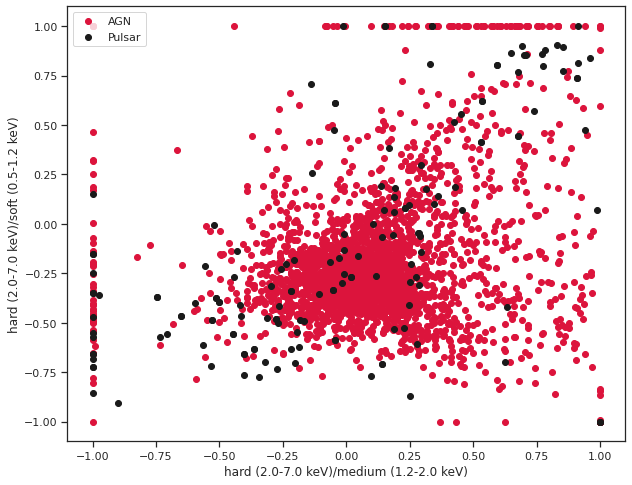

In [81]:
plt.figure(figsize=(10,8))
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({'font.size':16})
plt.scatter(agn_hm_clean, agn_ms_clean , label='AGN' , color='crimson')
plt.scatter(pulsar_hm_clean, pulsar_ms_clean , label='Pulsar' , color='k')
plt.legend(loc=2)
plt.xlabel('hard (2.0-7.0 keV)/medium (1.2-2.0 keV)')
plt.ylabel('hard (2.0-7.0 keV)/soft (0.5-1.2 keV)')
plt.savefig('hardness.jpg')
plt.show()